In [1]:
import pandas as pd

<h1>Create DataFrame</h1>

In [5]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


<h1>Split into Inputs and Targets</h1>

In [6]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

<h1>Label Encoding</h1>

In [9]:
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company'] = le_company.fit_transform(inputs['company'])
inputs['job'] = le_job.fit_transform(inputs['job'])
inputs['degree'] = le_degree.fit_transform(inputs['degree'])

inputs.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


<h1>Split into Train and Test</h1>

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

len(x_train), len(y_train), len(x_test), len(y_test)

(12, 12, 4, 4)

<h1>Decision Tree</h1>

In [13]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.75

<h1>Confusion Matrix</h1>

In [15]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)

cm = confusion_matrix(y_test, y_predicted)

<h1>HeatMap of CM</h1>

Text(69.0, 0.5, 'True')

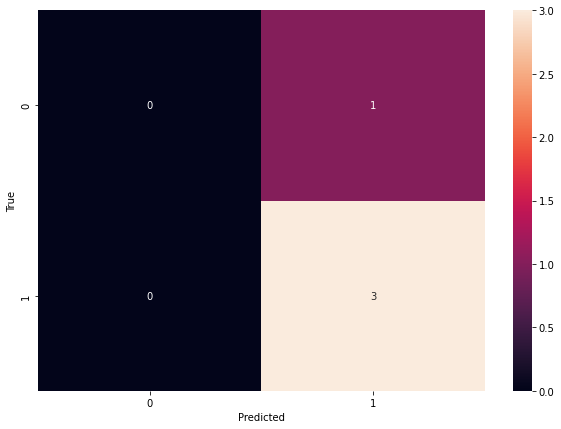

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))

sn.heatmap(cm, annot=True)

plt.xlabel('Predicted')
plt.ylabel('True')